### Importing data into pandas dataframe

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt


#Putting data into pandas dataframe
btc_data = pd.read_csv('Binance_BTCUSDT_1h.csv',skiprows = 1)
eth_data = pd.read_csv('Binance_ETHUSDT_1h.csv',skiprows = 1)
ada_data = pd.read_csv('Binance_ADAUSDT_1h.csv',skiprows = 1)


#Splicing data to specific date range
#start_date = '2021-01-01'
start_date = min(ada_data['Date'])

#end_date = '2024-04-22'
end_date = max(btc_data['Date'])

btc_pred = pd.to_datetime(btc_data['Date'])
btc_data = btc_data[(btc_data['Date'] >= start_date)&(btc_data['Date'] <= end_date)]
eth_data = eth_data[(eth_data['Date'] >= start_date)&(eth_data['Date'] <= end_date)]
ada_data = ada_data[(ada_data['Date'] >= start_date)&(ada_data['Date'] <= end_date)]


#Date/time data for easier plotting
btc_date_time = pd.to_datetime(btc_data['Date'])
eth_date_time = pd.to_datetime(eth_data['Date'])
ada_date_time = pd.to_datetime(ada_data['Date'])


#Open price data
btc_open_price = btc_data['Open']
eth_open_price = eth_data['Open']
ada_open_price = ada_data['Open']

#Plotting
plt.figure(figsize=(7,8),dpi=80)


plt.subplot(311)
plt.grid()
plt.plot(btc_date_time,btc_open_price,label = 'BTC',color ='#f7931a')
plt.title("BTC Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()

plt.subplot(312)
plt.grid()
plt.plot(eth_date_time,eth_open_price,label = 'ETH',color = '#716b94')
plt.title("ETH Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')#
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()

plt.subplot(313)
plt.grid()
plt.plot(ada_date_time,ada_open_price,label = 'ADA',color = '#1f0896')
plt.title("ADA Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()
plt.show()

### Calculating Correlation

In [2]:
import scipy.stats
corr_btc_eth, p1 = scipy.stats.pearsonr(btc_open_price,eth_open_price)
corr_btc_ada, p2 = scipy.stats.pearsonr(btc_open_price,ada_open_price)
corr_eth_ada, p3 = scipy.stats.pearsonr(eth_open_price,ada_open_price)

print("The correlation coefficient between Bitcoin and Etherium = ",corr_btc_eth,"p value =",p1)
print("The correlation coefficient between Bitcoin and Cardano = ",corr_btc_ada,"p value =",p2)
print("The correlation coefficient between Etherium and Cardano = ",corr_eth_ada,"p value =",p3)

The correlation coefficient between Bitcoin and Etherium =  0.9293672232391066 p value = 0.0
The correlation coefficient between Bitcoin and Cardano =  0.7770388392147555 p value = 0.0
The correlation coefficient between Etherium and Cardano =  0.83325893653843 p value = 0.0


### Rolling Average

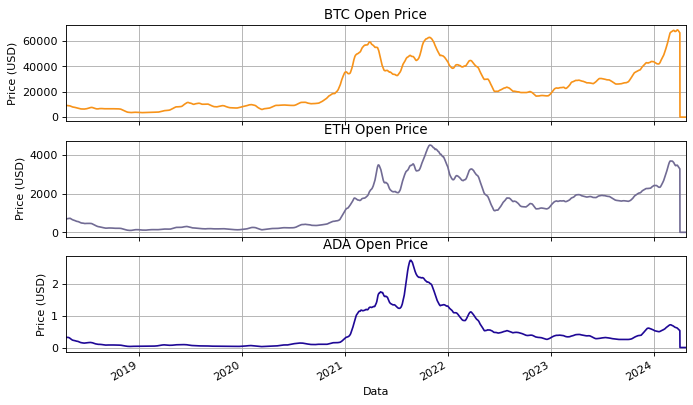

In [3]:
import numpy as np
window_size = 500

btc_price_rolling = btc_open_price.rolling(window_size).mean().fillna(0)
eth_price_rolling = eth_open_price.rolling(window_size).mean().fillna(0)
ada_price_rolling = ada_open_price.rolling(window_size).mean().fillna(0)

plt.figure(figsize=(10,6),dpi=80)
plt.subplot(311)
plt.grid()
plt.plot(btc_date_time,btc_price_rolling,label = 'BTC',color ='#f7931a')
plt.title("BTC Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()

plt.subplot(312)
plt.grid()
plt.plot(eth_date_time,eth_price_rolling,label = 'ETH',color = '#716b94')
plt.title("ETH Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')#
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()

plt.subplot(313)
plt.grid()
plt.plot(ada_date_time,ada_price_rolling,label = 'ADA',color = '#1f0896')
plt.title("ADA Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()
plt.show()

### Savitzky-Golay Filter

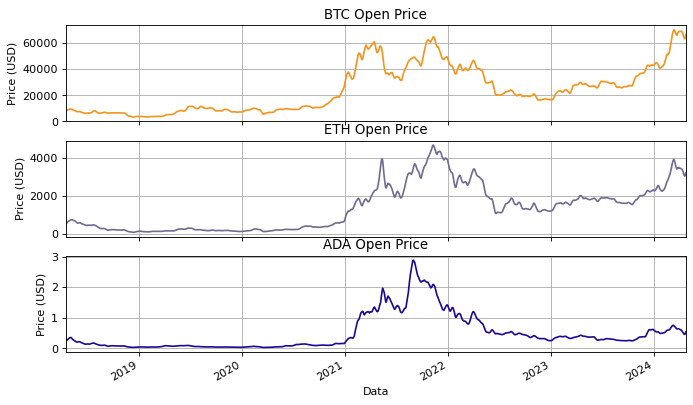

In [4]:
import scipy.signal
btc_price_savgol = scipy.signal.savgol_filter(btc_open_price,500,3)
eth_price_savgol = scipy.signal.savgol_filter(eth_open_price,500,3)
ada_price_savgol = scipy.signal.savgol_filter(ada_open_price,500,3)


plt.figure(figsize=(10,6),dpi=80)
plt.subplot(311)
plt.grid()
plt.plot(btc_date_time,btc_price_savgol,label = 'BTC',color ='#f7931a')
plt.title("BTC Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()

plt.subplot(312)
plt.grid()
plt.plot(eth_date_time,eth_price_savgol,label = 'ETH',color = '#716b94')
plt.title("ETH Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()

plt.subplot(313)
plt.grid()
plt.plot(ada_date_time,ada_price_savgol,label = 'ADA',color = '#1f0896')
plt.title("ADA Open Price")
plt.xlabel('Data')
plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.gcf().autofmt_xdate()
plt.show()

### Comparison

(17638.166666666668, 19835.958333333332)

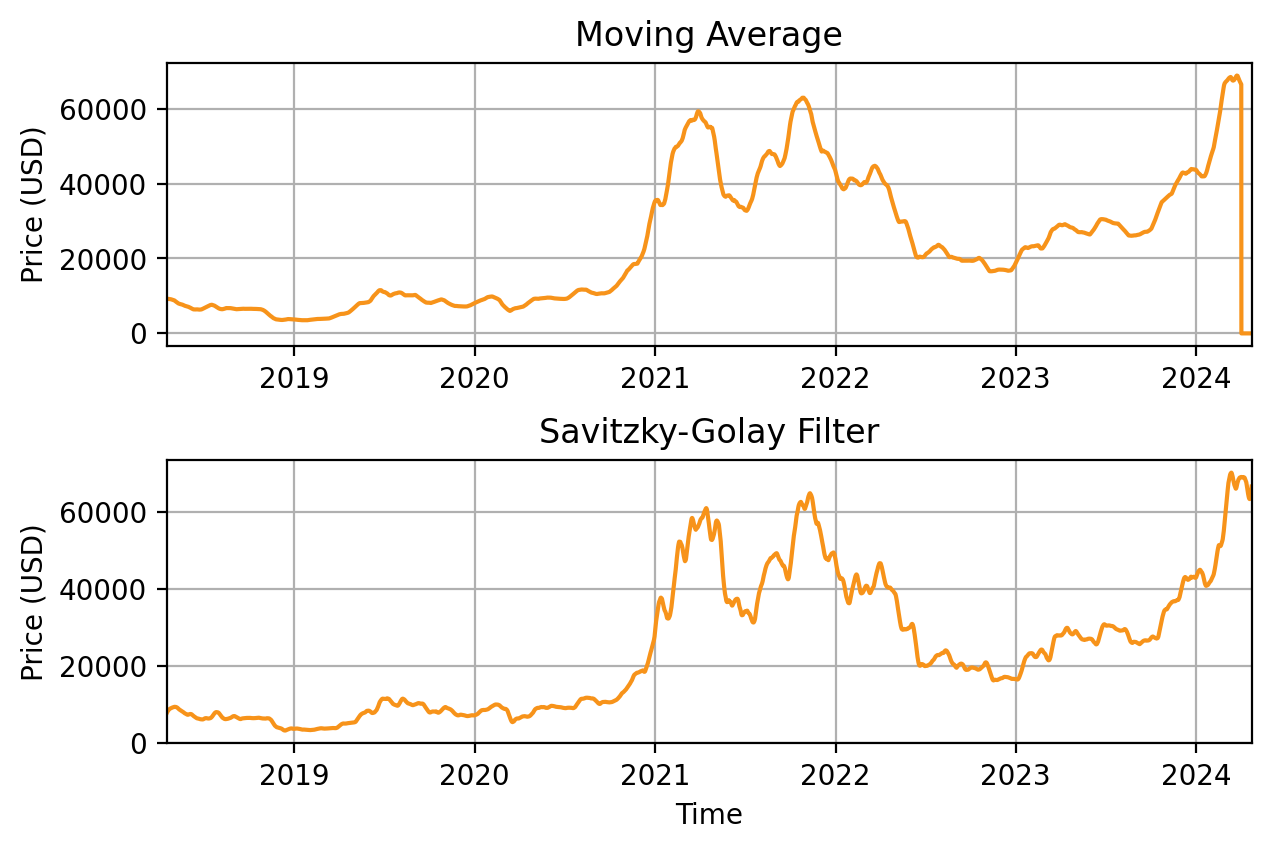

In [5]:
plt.figure(figsize=(7,7),dpi=200)
plt.subplot(311)
plt.grid()
plt.plot(btc_date_time,btc_price_rolling,label = 'BTC',color ='#f7931a')
plt.title("Moving Average")

plt.ylabel('Price (USD)')
plt.xlim(min(btc_date_time),max(btc_date_time))
plt.subplots_adjust(hspace=0.4)
plt.subplot(312)
plt.grid()
plt.plot(btc_date_time,btc_price_savgol,label = 'ETH',color = '#f7931a')
plt.title("Savitzky-Golay Filter")
plt.xlabel('Time')
plt.ylabel('Price (USD)')#
plt.xlim(min(btc_date_time),max(btc_date_time))



In [6]:
norm_btc = (btc_price_savgol-min(btc_price_savgol))/(max(btc_price_savgol) -min(btc_price_savgol)) 
norm_eth = (eth_price_savgol-min(eth_price_savgol))/(max(eth_price_savgol) -min(eth_price_savgol)) 
norm_ada = (ada_price_savgol-min(ada_price_savgol))/(max(ada_price_savgol) -min(ada_price_savgol)) 

### Lag

maximum correlation of BTC/ETH 0.9683683001284678
lag at max: [0]
maximum correlation of BTC/ETH 0.8681764544906994
lag at max: [0]


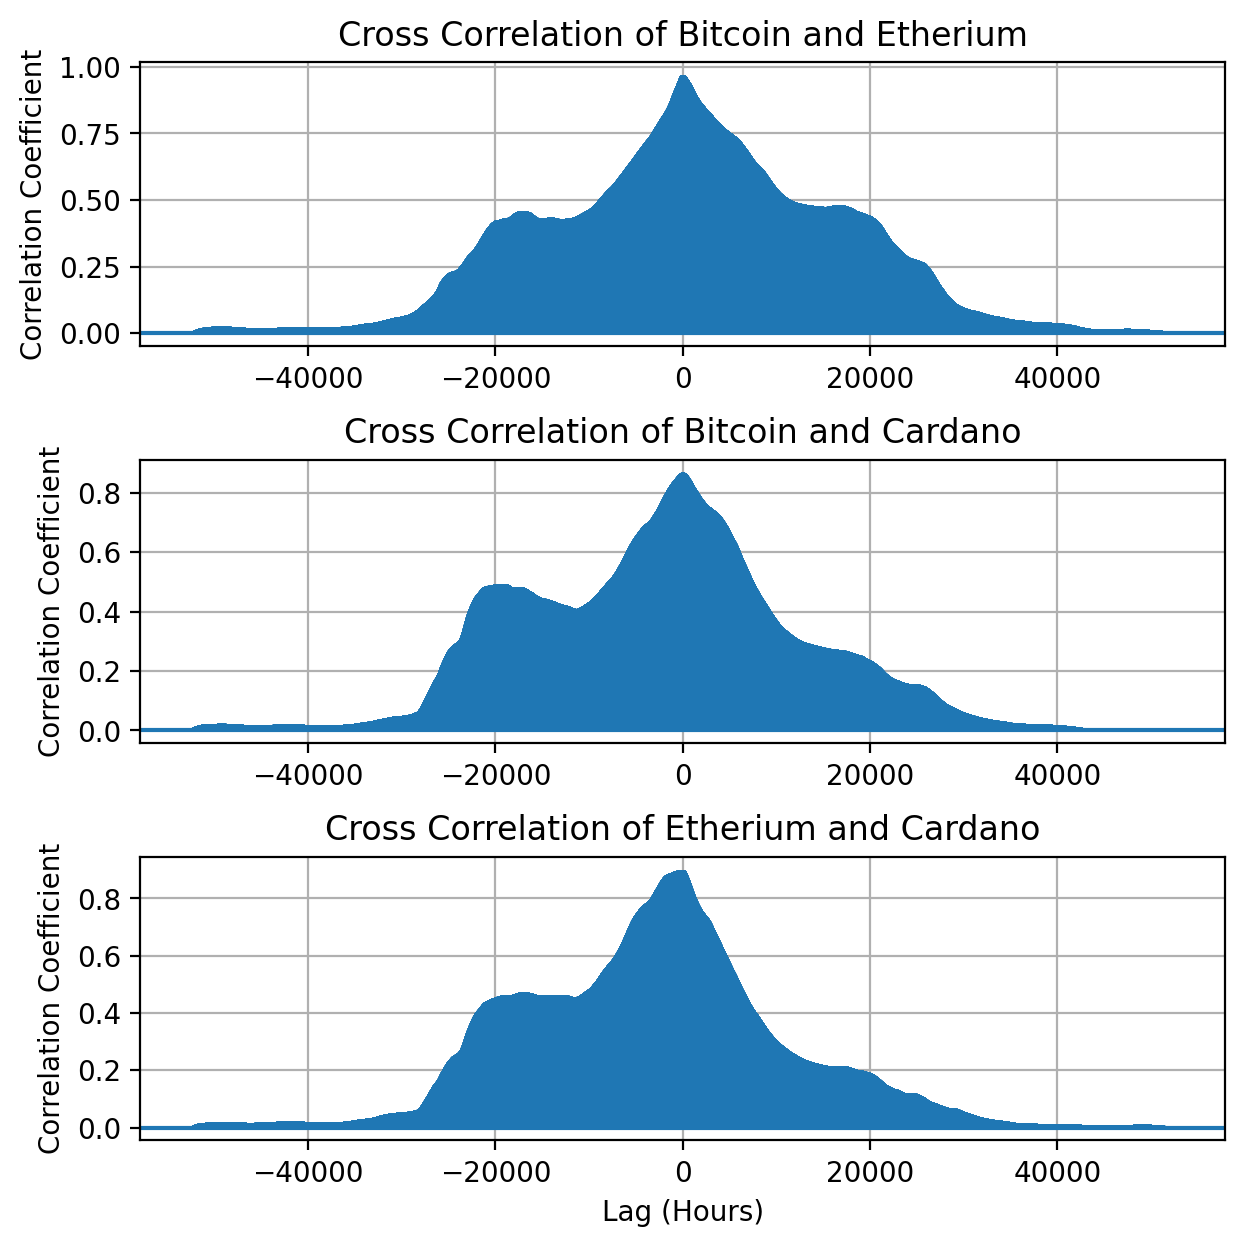

maximum correlation of BTC/ETH 0.9001933828970904
lag at max: [-52]


In [7]:
import numpy as np


plt.figure(figsize=(7,7),dpi=200)
plt.subplot(311)
plt.grid()
lags,c,a,b = plt.xcorr(norm_btc, norm_eth, normed=True, usevlines=True, maxlags=len(norm_btc)-1)
plt.title("Cross Correlation of Bitcoin and Etherium")
plt.ylabel('Correlation Coefficient')

print("maximum correlation of BTC/ETH",max(c))
print("lag at max:",lags[np.where(c==max(c))])

plt.subplot(312)
plt.grid()
lags2,c2,a,b = plt.xcorr(norm_btc, norm_ada, normed=True, usevlines=True, maxlags=len(norm_btc)-1)
plt.title("Cross Correlation of Bitcoin and Cardano")
plt.ylabel('Correlation Coefficient')
plt.subplots_adjust(hspace=0.4)

print("maximum correlation of BTC/ETH",max(c2))
print("lag at max:",lags2[np.where(c2==max(c2))])


plt.subplot(313)
plt.grid()
lags3, c3,a,b =plt.xcorr(norm_eth, norm_ada, normed=True, usevlines=True, maxlags=len(norm_btc)-1)
plt.title("Cross Correlation of Etherium and Cardano")
plt.xlabel('Lag (Hours)')
plt.ylabel('Correlation Coefficient')
plt.show()

print("maximum correlation of BTC/ETH",max(c3))
print("lag at max:",lags3[np.where(c3==max(c3))])




### Retruns and Volatility

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


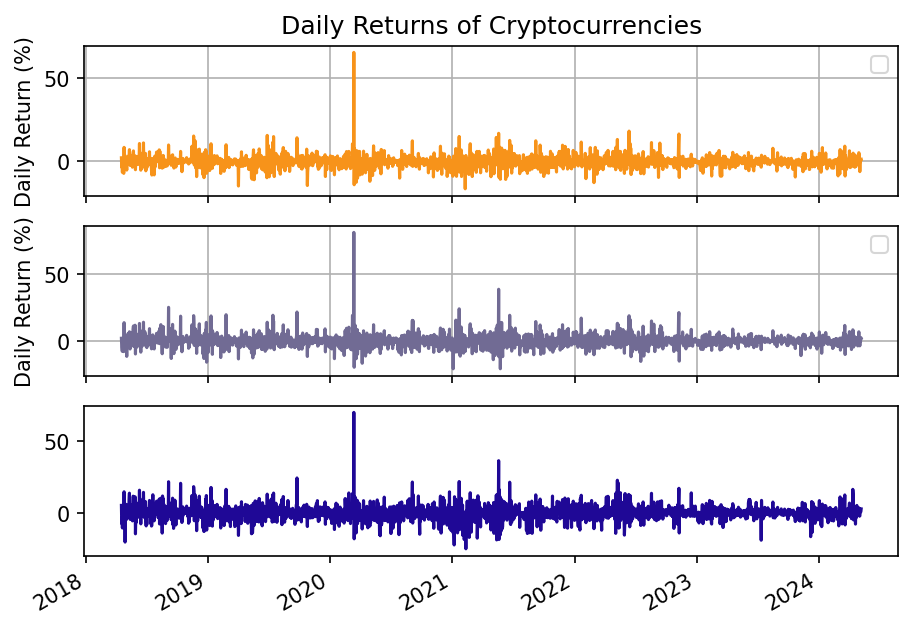

Standard Deviation of Daily Returns:
Bitcoin:, 3.6824967347554627
Etherium:, 4.8553345860806045
Cardano:, 5.429898625626724


In [9]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt


#Importing daily data
btc_data = pd.read_csv('Binance_BTCUSDT_d.csv',skiprows = 1)
eth_data = pd.read_csv('Binance_ETHUSDT_d.csv',skiprows = 1)
ada_data = pd.read_csv('Binance_ADAUSDT_d.csv',skiprows = 1)


#Splicing data to specific date range

#start_date = '2020-05-01' 
start_date = min(ada_data['Date'])
#end_date = '2024-04-22'
end_date = max(btc_data['Date'])

btc_data = btc_data[(btc_data['Date'] >= start_date)&(btc_data['Date'] <= end_date)]
eth_data = eth_data[(eth_data['Date'] >= start_date)&(eth_data['Date'] <= end_date)]
ada_data = ada_data[(ada_data['Date'] >= start_date)&(ada_data['Date'] <= end_date)]

#Open price data
btc_open_price = btc_data['Open']
eth_open_price = eth_data['Open']
ada_open_price = ada_data['Open']

#Calculating percentage returns
btc_returns = btc_open_price.pct_change()*100
eth_returns = eth_open_price.pct_change()*100
ada_returns = ada_open_price.pct_change()*100

btc_date_time = pd.to_datetime(btc_data['Date'])
eth_date_time = pd.to_datetime(eth_data['Date'])
ada_date_time = pd.to_datetime(ada_data['Date'])

plt.figure(figsize=(7, 5),dpi=150)

plt.subplot(311)
plt.title('Daily Returns of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid()
plt.plot(btc_date_time, btc_returns, color='#f7931a')


plt.subplot(312)
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid()
plt.plot(eth_date_time, eth_returns, color='#716b94')

plt.subplot(313)
plt.plot(ada_date_time, ada_returns, color='#1f0896')
plt.gcf().autofmt_xdate()
plt.show()

btc_std = btc_returns.std()
eth_std = eth_returns.std()
ada_std = ada_returns.std()

print("Standard Deviation of Daily Returns:")
print("Bitcoin:," ,btc_std)
print("Etherium:," ,eth_std)
print("Cardano:," ,ada_std)



R^2 =  0.14453213008718135
m =  0.03082543991350506 ± 0.010928287691989075
c =  4.071368694656975 ± 0.30442686783372824


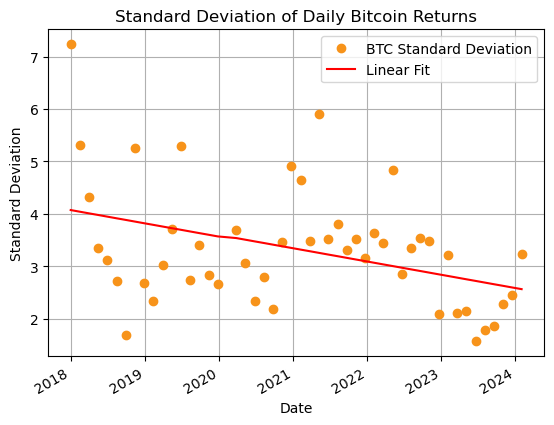

In [12]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

#Creating arrays to iterate over each date
startarray = pd.date_range(start = '2018-01-01',end = '2024-02-01',periods = 50)
startarray = startarray.strftime('%Y-%m-%d').tolist()

endarray = pd.date_range(start = '2018-02-01',end = '2024-04-01',periods = 50)
endarray = endarray.strftime('%Y-%m-%d').tolist()

stdevarray = np.array([])

#This loop cycles over the start and end values, calculating the returns and the standard deviation
for i in range(len(startarray)):
    btc_data = pd.read_csv('Binance_BTCUSDT_d.csv',skiprows = 1)
    eth_data = pd.read_csv('Binance_ETHUSDT_d.csv',skiprows = 1)
    ada_data = pd.read_csv('Binance_ADAUSDT_d.csv',skiprows = 1)
    start_date = startarray[i] 
    end_date = endarray[i]

    btc_data = btc_data[(btc_data['Date'] >= start_date)&(btc_data['Date'] <= end_date)]
    eth_data = eth_data[(eth_data['Date'] >= start_date)&(eth_data['Date'] <= end_date)]
    ada_data = ada_data[(ada_data['Date'] >= start_date)&(ada_data['Date'] <= end_date)]

    btc_date_time = pd.to_datetime(btc_data['Date'])
    eth_date_time = pd.to_datetime(eth_data['Date'])
    ada_date_time = pd.to_datetime(ada_data['Date'])

    btc_open_price = btc_data['Open']
    eth_open_price = eth_data['Open']
    ada_open_price = ada_data['Open']

    btc_returns = btc_open_price.pct_change()*100
    eth_returns = eth_open_price.pct_change()*100
    ada_returns = ada_open_price.pct_change()*100

    btc_std = btc_returns.std()
    eth_std = eth_returns.std()
    ada_std = ada_returns.std()

    stdevarray = np.append(stdevarray, btc_std)

# Deleting anomalies
stdevarray = np.delete(stdevarray,17)
startarray = np.delete(startarray,17)

#Converting to datetime for plotting
start_datetime_array = pd.to_datetime(startarray)


def linear(x,m,c):
    return (-m*x)+c

popt, pcov = curve_fit(linear, range(len(stdevarray)), stdevarray)

m, c = popt

perrors = np.sqrt(np.diag(pcov))
m_error, c_error = perrors

xfit = np.linspace(0,len(stdevarray),49)
yfit = linear(xfit,m,c)

r_squared = r2_score(stdevarray, yfit)



print("R^2 = ", r_squared)
print("m = ", m, "±", m_error)
print("c = ", c, "±", c_error)
plt.plot(start_datetime_array,stdevarray,label = 'BTC Standard Deviation',linestyle = "None",marker = "o",color ='#f7931a')
plt.plot(start_datetime_array,yfit,color = "red",label = "Linear Fit")
plt.title("Standard Deviation of Daily Bitcoin Returns")
plt.xlabel('Date')
plt.legend()
plt.ylabel('Standard Deviation')
plt.grid()
plt.gcf().autofmt_xdate()
plt.show()